# TinyML - XGboost (Classifier)

In [ ]:
#!pip install micromlgen
#!pip install xgboost

## 1. Importing libraries

In [2]:
from micromlgen import port

import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform, randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix

## 2. Load Dataset

The Iris dataset is a classic dataset in the field of machine learning and statistics. It was introduced by Sir Ronald A. Fisher in 1936 as an example of discriminant analysis. The dataset is often used for educational purposes and is a common starting point for the practice of pattern classification.


Attributes:

- Sepal length (in centimeters)

- Sepal width (in centimeters)

- Petal length (in centimeters)

- Petal width (in centimeters)

Species:

- 0 - Setosa

- 1 - Versicolor

- 2 - Virginica

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
print('Input shape: ', X.shape)
print('Target variable shape: ', y.shape)

Input shape:  (150, 4)
Target variable shape:  (150,)


In [5]:
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(y[:80])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


## 3. Split into training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 4. Create the classification model

In [8]:
model = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 5, n_estimators = 50)

## 5. Train the model

In [9]:
model.fit(X_train, y_train)

[18:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## (BONUS) Hyperparameter tuning

RandomizedSearchCV is a function provided by the scikit-learn library in Python, commonly used for hyperparameter tuning in machine learning models through cross-validation. This technique proves beneficial when dealing with an extensive search space for hyperparameters and aims to identify the most effective combination of values.

Step-by-Step Explanation
1. Definition of Parameter Space:
Before utilizing RandomizedSearchCV, one needs to specify a search space for the model's hyperparameters. Rather than providing a specific grid of values, distributions are defined for each hyperparameter.

2. Random Sampling:
Instead of evaluating all conceivable combinations of hyperparameters (as in the case of GridSearchCV), RandomizedSearchCV randomly selects a fixed set of combinations for evaluation. This proves advantageous when dealing with a large search space.

3. Model Training:
For each randomly selected set of hyperparameters, RandomizedSearchCV trains the model using cross-validation. The data is divided into folds, with the model being trained on some folds and evaluated on the remaining folds.

4. Performance Evaluation:
Performance is measured using a specified metric (e.g., accuracy, F1-score). The objective is to find hyperparameters that maximize or minimize this metric, depending on the problem at hand (e.g., maximizing accuracy in a classification problem).

5. Selection of the Best Model:
Upon completion of the random search, RandomizedSearchCV returns the set of hyperparameters that led to the best average performance during cross-validation.

By employing RandomizedSearchCV, computational time can be saved compared to an exhaustive grid search (GridSearchCV), especially when dealing with a large search space. This efficiency stems from exploring a random sample of the hyperparameter space rather than evaluating all possible combinations.

In [ ]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

best_model = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)



best_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

In [10]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            best_params = results['params'][candidate]
            print("Best parameters found:")
            for param, value in best_params.items():
                print("  {0}: {1}".format(param, value))
            print("")

In [ ]:
report_best_scores(best_model.cv_results_, 1)

## 6. Visualization

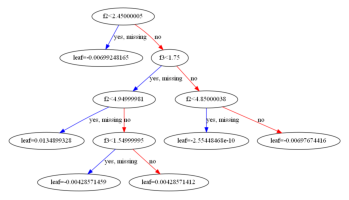

<Figure size 864x576 with 0 Axes>

In [13]:
plot_tree(model, num_trees=1, rankdir='TD')  # O argumento 'rankdir' controla a direção da árvore (LR: left to right / TD: top to down)
plt.figure(figsize=(12, 8))
plt.show()

## 7 Evaluating the model with the training data

In [14]:
training_predict = model.predict(X_train)

In [15]:
print(metrics.classification_report(y_train, training_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        31
           1      0.972     0.946     0.959        37
           2      0.947     0.973     0.960        37

    accuracy                          0.971       105
   macro avg      0.973     0.973     0.973       105
weighted avg      0.972     0.971     0.971       105



In [ ]:
plot_confusion_matrix(model, X_train, y_train, cmap='Blues')

In [16]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_train, training_predict)*100,2)}%')

Model accuracy: 97.14%


## 8. Evaluating the model with test data

In [17]:
test_predict = model.predict(X_test)

In [18]:
print(metrics.classification_report(y_test, test_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [19]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_test, test_predict)*100,2)}%')

Model accuracy: 100.0%


## 9. Obtaining the model to be implemented in the microcontroller

In [28]:
with open('./XGBoostClassifier/XGBClassifier.h', 'w') as file:
    file.write(port(model))

XGBoostError: [18:53:22] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "C:\Users\Thommas\AppData\Local\Temp\tmpkmgyngar.json": Permission denied

## 10. Saves the template in a .h file

In [ ]:
with open('random_forest_classifier.h', 'w') as file:
    file.write(port(model))